In [3]:
#image visualisation 
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image

In [4]:
#load data
train_df = pd.read_csv('../input/train.csv')
train_df.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [5]:
#target = train_df["Target"]
labels = train_df["Target"]
ids = train_df["Id"]

In [6]:
#creation of classes
channels = ['_yellow', '_red', '_green', '_blue']

index_class_dict = {
   # "Nucleoplasm": 0,
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8,
    9: 9,
    10: 10,
    11: 11,
    12: 12,
    13: 13,
    14: 14,
    15: 15,
    16: 16,
    17: 17,
    18: 18,
    19: 19,
    20: 20,
    21: 21,
    22: 22,
    23: 23,
    24: 24,
    25: 25,
    26: 26,
    27: 27
}

dict = {v: k for k, v in index_class_dict.items()}

def to_cat_array(label_list):
        result = np.zeros(len(index_class_dict), dtype = np.float32)
        for label in label_list:
            result[dict[label]] = 1.0
        return result
    
#index_class_dict

In [7]:
train_df[f'Target_Vec'] = train_df['Target'].map(lambda x: list(map(int, x.strip().split())))
train_df.head()

,Id,Target,Target_Vec
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,"[16, 0]"
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,"[7, 1, 2, 0]"
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,[5]
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,[1]
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,[18]


In [8]:
from skimage.io import imread
images=[imread('../input/train/'+x+'_green.png', as_gray=True) for x in train_df.Id]
print(images[0].shape)
train_df['Image']=images

(512, 512)


In [9]:
#mpm
train_df.head()

,Id,Target,Target_Vec,Image
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,"[16, 0]","[[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,..."
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,"[7, 1, 2, 0]","[[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,..."
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,[5],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,[1],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,[18],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [10]:
#test
fake_label_lists = [[0, 2], [4, 10], [3, 8],[5, 12, 22]]

In [11]:
categories = list (map(to_cat_array, fake_label_lists))
categories

[array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)]

In [12]:
train_df['Label'] = list(map(to_cat_array, train_df.Target_Vec))

In [13]:
train_df.head()

,Id,Target,Target_Vec,Image,Label
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,"[16, 0]","[[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,"[7, 1, 2, 0]","[[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,[5],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,[1],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,[18],"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [14]:
images = train_df.Image.iloc[0:500]

In [15]:
images.head()

0    [[9, 6, 27, 11, 1, 4, 20, 39, 9, 13, 1, 7, 11,...
1    [[1, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,...
2    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: Image, dtype: object

In [16]:
labels = train_df.Label.iloc[0:500]

In [18]:
labels.head()

0    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
3    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Label, dtype: object

In [19]:
images.shape

(500,)

In [20]:
labels.shape

(500,)

In [30]:
from sklearn.model_selection import train_test_split
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


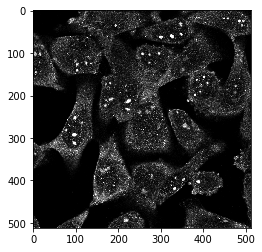

In [33]:
img=train_images.iloc[4]
plt.imshow(img,cmap='gray')

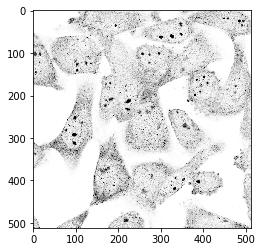

In [34]:
plt.imshow(img,cmap='binary')

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
#clf.fit([np.array(image, dtype=np.int8).reshape(512*512) for image in train_images], [np.array(label, dtype=np.int64) for label in train_labels])
#clf.score([np.array(image, dtype=np.int8).reshape(512*512) for image in train_images], [np.array(label, dtype=np.int64) for label in train_labels])

In [37]:
[np.array(image, dtype=np.int8).reshape(512*512) for image in train_images]

[array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 array([0, 0, 0, ..., 3, 7, 0], dtype=int8),
 array([0, 0, 0, ..., 3, 0, 6], dtype=int8),
 array([ 1,  0,  0, ...,  0, 44,  0], dtype=int8),
 array([ 0,  0,  0, ..., 34, 13, 14], dtype=int8),
 array([ 0,  0,  0, ...,  2, 26, 10], dtype=int8),
 array([44, 45, 38, ..., 30, 10,  1], dtype=int8),
 array([0, 0, 0, ..., 2, 3, 0], dtype=int8),
 array([0, 0, 6, ..., 0, 0, 3], dtype=int8),
 array([ 9,  0, 34, ..., 23,  2, 18], dtype=int8),
 array([ 0,  0, 14, ..., 27,  0, 73], dtype=int8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 array([ 0,  5, 25, ...,  0,  0,  0], dtype=int8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 array([41,  0, 18, ...,  0,  0,  0], dtype=int8),
 array([ 0,  0,  0, ...,  5, 18, 27], dtype=int8),
 array([2, 0, 8, ..., 0, 0, 0], dtype=int8),
 array([46, 31, 15, ..., 18,  6,  7], dtype=int8),
 array([15,  0,  0, ...,  0,  0, 22], dtype=int8),
 array([ 0,  0,  0, ..., 23,  4,  4], dtype=int8),
 array([0, 0, 0, ..., 0, 0, 

In [38]:
[np.array(label, dtype=np.int64) for label in train_labels]

[array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        

In [42]:
#echec
#cross_val_score(clf, [np.array(image, dtype=np.int8).reshape(512*512) for image in train_images], [np.array(label, dtype=np.int64) for label in train_labels], cv=10)